### SVC: Support Vector Classifier

- Iris Dataset
- Visualization

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(
    data=np.c_[iris.data, iris.target],
    columns=["sepal length", "sepal width", "petal length", "petal width", "target"],
)

FEATURES = ["sepal width", "petal length"]

df = df[[*FEATURES, "target"]]
df = df[df["target"] != 1]

X = df[FEATURES]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=30
)

df.head()

,sepal width,petal length,target
0,3.5,1.4,0.0
1,3.0,1.4,0.0
2,3.2,1.3,0.0
3,3.1,1.5,0.0
4,3.6,1.4,0.0


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel="linear", C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

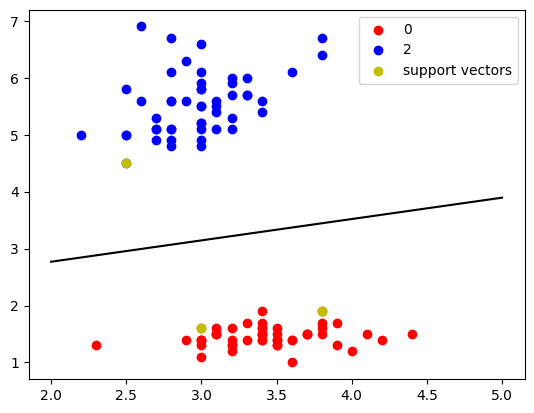

In [3]:
import matplotlib.pyplot as plt

t0 = df[df["target"] == 0]
t2 = df[df["target"] == 2]

w = model.coef_[0]
b = model.intercept_
support_vectors = model.support_vectors_

plt.scatter(x=FEATURES[0], y=FEATURES[1], data=t0, c="r", label="0")
plt.scatter(x=FEATURES[0], y=FEATURES[1], data=t2, c="b", label="2")
plt.scatter(
    support_vectors[:, 0], support_vectors[:, 1], c="y", label="support vectors"
)
line = np.linspace(2, 5)
plt.plot(line, -(w[0] * line + b) / w[1], c="k")
plt.legend()
plt.show()